In [2]:
import pandas as pd 
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 
import datetime as dt

In [3]:
#connect to YahooOptions API
spy = pdr.YahooOptions('SPY')  

In [4]:
#user headers, wo user headers the API outputs an error
spy.headers = {'User-Agent': 'Firefox'}

In [35]:
#all options data for SPY 
allopt = spy.get_all_data()
allopt.reset_index(inplace = True)

In [36]:
allopt.head()

,Strike,Expiry,Type,Symbol,Last,Bid,Ask,Chg,PctChg,Vol,Open_Int,IV,Root,IsNonstandard,Underlying,Underlying_Price,Quote_Time,Last_Trade_Date,JSON
0,85.0,2022-12-16,call,SPY221216C00085000,280.67,289.26,290.47,0.000000,0.000000,10.0,7.0,1.757325,SPY,False,SPY,374.29,2022-10-21 20:00:00,2022-10-20 18:15:34,"{'contractSymbol': 'SPY221216C00085000', 'stri..."
1,85.0,2022-12-16,put,SPY221216P00085000,0.01,0.00,0.01,0.000000,0.000000,45.0,35550.0,1.125004,SPY,False,SPY,374.29,2022-10-21 20:00:00,2022-10-21 19:46:56,"{'contractSymbol': 'SPY221216P00085000', 'stri..."
2,90.0,2022-12-16,call,SPY221216C00090000,280.41,284.29,285.50,4.640015,1.682567,66.0,657.0,1.703126,SPY,False,SPY,374.29,2022-10-21 20:00:00,2022-10-21 15:59:00,"{'contractSymbol': 'SPY221216C00090000', 'stri..."
3,90.0,2022-12-16,put,SPY221216P00090000,0.01,0.00,0.01,0.000000,0.000000,2021.0,20709.0,1.062505,SPY,False,SPY,374.29,2022-10-21 20:00:00,2022-10-21 17:14:37,"{'contractSymbol': 'SPY221216P00090000', 'stri..."
4,95.0,2022-12-16,call,SPY221216C00095000,295.33,262.89,264.13,0.000000,0.000000,8.0,2.0,0.000010,SPY,False,SPY,374.29,2022-10-21 20:00:00,2022-09-15 19:54:13,"{'contractSymbol': 'SPY221216C00095000', 'stri..."


In [33]:
allopt[allopt.Expiry == allopt.Expiry[1]]

,Strike,Expiry,Type,Symbol,Last,Bid,Ask,Chg,PctChg,Vol,Open_Int,IV,Root,IsNonstandard,Underlying,Underlying_Price,Quote_Time,Last_Trade_Date,JSON
0,85.0,2022-12-16,call,SPY221216C00085000,280.67,289.26,290.47,0.000000,0.000000,10.0,7.0,1.757325,SPY,False,SPY,374.29,2022-10-21 20:00:00,2022-10-20 18:15:34,"{'contractSymbol': 'SPY221216C00085000', 'stri..."
1,85.0,2022-12-16,put,SPY221216P00085000,0.01,0.00,0.01,0.000000,0.000000,45.0,35550.0,1.125004,SPY,False,SPY,374.29,2022-10-21 20:00:00,2022-10-21 19:46:56,"{'contractSymbol': 'SPY221216P00085000', 'stri..."
2,90.0,2022-12-16,call,SPY221216C00090000,280.41,284.29,285.50,4.640015,1.682567,66.0,657.0,1.703126,SPY,False,SPY,374.29,2022-10-21 20:00:00,2022-10-21 15:59:00,"{'contractSymbol': 'SPY221216C00090000', 'stri..."
3,90.0,2022-12-16,put,SPY221216P00090000,0.01,0.00,0.01,0.000000,0.000000,2021.0,20709.0,1.062505,SPY,False,SPY,374.29,2022-10-21 20:00:00,2022-10-21 17:14:37,"{'contractSymbol': 'SPY221216P00090000', 'stri..."
4,95.0,2022-12-16,call,SPY221216C00095000,295.33,262.89,264.13,0.000000,0.000000,8.0,2.0,0.000010,SPY,False,SPY,374.29,2022-10-21 20:00:00,2022-09-15 19:54:13,"{'contractSymbol': 'SPY221216C00095000', 'stri..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7209,700.0,2022-12-16,put,SPY221216P00700000,342.67,324.95,326.17,0.000000,0.000000,4.0,0.0,0.701175,SPY,False,SPY,374.29,2022-10-21 20:00:00,2022-10-12 19:51:54,"{'contractSymbol': 'SPY221216P00700000', 'stri..."
7222,705.0,2022-12-16,call,SPY221216C00705000,0.01,0.00,0.01,0.000000,0.000000,2.0,5792.0,0.492193,SPY,False,SPY,374.29,2022-10-21 20:00:00,2022-10-10 15:22:20,"{'contractSymbol': 'SPY221216C00705000', 'stri..."
7223,705.0,2022-12-16,put,SPY221216P00705000,310.68,282.46,283.79,0.000000,0.000000,4.0,5.0,0.000010,SPY,False,SPY,374.29,2022-10-21 20:00:00,2022-07-22 19:35:02,"{'contractSymbol': 'SPY221216P00705000', 'stri..."
7232,710.0,2022-12-16,call,SPY221216C00710000,0.01,0.00,0.01,0.000000,0.000000,4.0,4577.0,0.492193,SPY,False,SPY,374.29,2022-10-21 20:00:00,2022-10-10 15:22:39,"{'contractSymbol': 'SPY221216C00710000', 'stri..."


In [34]:
allopt[allopt.Expiry == '2022-12-16']

,Strike,Expiry,Type,Symbol,Last,Bid,Ask,Chg,PctChg,Vol,Open_Int,IV,Root,IsNonstandard,Underlying,Underlying_Price,Quote_Time,Last_Trade_Date,JSON
0,85.0,2022-12-16,call,SPY221216C00085000,280.67,289.26,290.47,0.000000,0.000000,10.0,7.0,1.757325,SPY,False,SPY,374.29,2022-10-21 20:00:00,2022-10-20 18:15:34,"{'contractSymbol': 'SPY221216C00085000', 'stri..."
1,85.0,2022-12-16,put,SPY221216P00085000,0.01,0.00,0.01,0.000000,0.000000,45.0,35550.0,1.125004,SPY,False,SPY,374.29,2022-10-21 20:00:00,2022-10-21 19:46:56,"{'contractSymbol': 'SPY221216P00085000', 'stri..."
2,90.0,2022-12-16,call,SPY221216C00090000,280.41,284.29,285.50,4.640015,1.682567,66.0,657.0,1.703126,SPY,False,SPY,374.29,2022-10-21 20:00:00,2022-10-21 15:59:00,"{'contractSymbol': 'SPY221216C00090000', 'stri..."
3,90.0,2022-12-16,put,SPY221216P00090000,0.01,0.00,0.01,0.000000,0.000000,2021.0,20709.0,1.062505,SPY,False,SPY,374.29,2022-10-21 20:00:00,2022-10-21 17:14:37,"{'contractSymbol': 'SPY221216P00090000', 'stri..."
4,95.0,2022-12-16,call,SPY221216C00095000,295.33,262.89,264.13,0.000000,0.000000,8.0,2.0,0.000010,SPY,False,SPY,374.29,2022-10-21 20:00:00,2022-09-15 19:54:13,"{'contractSymbol': 'SPY221216C00095000', 'stri..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7209,700.0,2022-12-16,put,SPY221216P00700000,342.67,324.95,326.17,0.000000,0.000000,4.0,0.0,0.701175,SPY,False,SPY,374.29,2022-10-21 20:00:00,2022-10-12 19:51:54,"{'contractSymbol': 'SPY221216P00700000', 'stri..."
7222,705.0,2022-12-16,call,SPY221216C00705000,0.01,0.00,0.01,0.000000,0.000000,2.0,5792.0,0.492193,SPY,False,SPY,374.29,2022-10-21 20:00:00,2022-10-10 15:22:20,"{'contractSymbol': 'SPY221216C00705000', 'stri..."
7223,705.0,2022-12-16,put,SPY221216P00705000,310.68,282.46,283.79,0.000000,0.000000,4.0,5.0,0.000010,SPY,False,SPY,374.29,2022-10-21 20:00:00,2022-07-22 19:35:02,"{'contractSymbol': 'SPY221216P00705000', 'stri..."
7232,710.0,2022-12-16,call,SPY221216C00710000,0.01,0.00,0.01,0.000000,0.000000,4.0,4577.0,0.492193,SPY,False,SPY,374.29,2022-10-21 20:00:00,2022-10-10 15:22:39,"{'contractSymbol': 'SPY221216C00710000', 'stri..."


In [31]:
#transforming data for future purposes 

exp1 = allopt[allopt.Expiry == allopt.Expiry[1]] 

calls = exp1[exp1.Type=='call']
calls['C'] = (calls.Bid+calls.Ask)/2
puts = exp1[exp1.Type=='put']
puts['P'] = (puts.Bid+puts.Ask)/2
df = pd.merge(calls, puts, how='inner', on ='Strike')

/var/folders/gz/7lrqz2x101n4z64lr7dz7vhh0000gn/T/ipykernel_27803/558132854.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calls['C'] = (calls.Bid+calls.Ask)/2
/var/folders/gz/7lrqz2x101n4z64lr7dz7vhh0000gn/T/ipykernel_27803/558132854.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  puts['P'] = (puts.Bid+puts.Ask)/2


In [32]:
df.head(3)

,Strike,Expiry_x,Type_x,Symbol_x,Last_x,Bid_x,Ask_x,Chg_x,PctChg_x,Vol_x,...,Open_Int_y,IV_y,Root_y,IsNonstandard_y,Underlying_y,Underlying_Price_y,Quote_Time_y,Last_Trade_Date_y,JSON_y,P
0,85.0,2022-12-16,call,SPY221216C00085000,280.67,289.26,290.47,0.000000,0.000000,10.0,...,35550.0,1.125004,SPY,False,SPY,374.29,2022-10-21 20:00:00,2022-10-21 19:46:56,"{'contractSymbol': 'SPY221216P00085000', 'stri...",0.005
1,90.0,2022-12-16,call,SPY221216C00090000,280.41,284.29,285.50,4.640015,1.682567,66.0,...,20709.0,1.062505,SPY,False,SPY,374.29,2022-10-21 20:00:00,2022-10-21 17:14:37,"{'contractSymbol': 'SPY221216P00090000', 'stri...",0.005
2,95.0,2022-12-16,call,SPY221216C00095000,295.33,262.89,264.13,0.000000,0.000000,8.0,...,12438.0,1.031255,SPY,False,SPY,374.29,2022-10-21 20:00:00,2022-10-21 19:41:52,"{'contractSymbol': 'SPY221216P00095000', 'stri...",0.005


### Lets test the Put/Call Parity

$$C + K e^{-rT} = P + S_0$$

This equation implies the NAC condition (for puts and calls with the same strike price).  Parity: $P = C + K e^{-rT} - S_0$

We can also derive the timesensitive interest rate, $r = -\frac{ln |\frac{P + S_0 - C}{K}|}{T}$

In [24]:
#col parity from equasion up
df["Parity"] = df.C + df.Strike - df.Underlying_Price_x

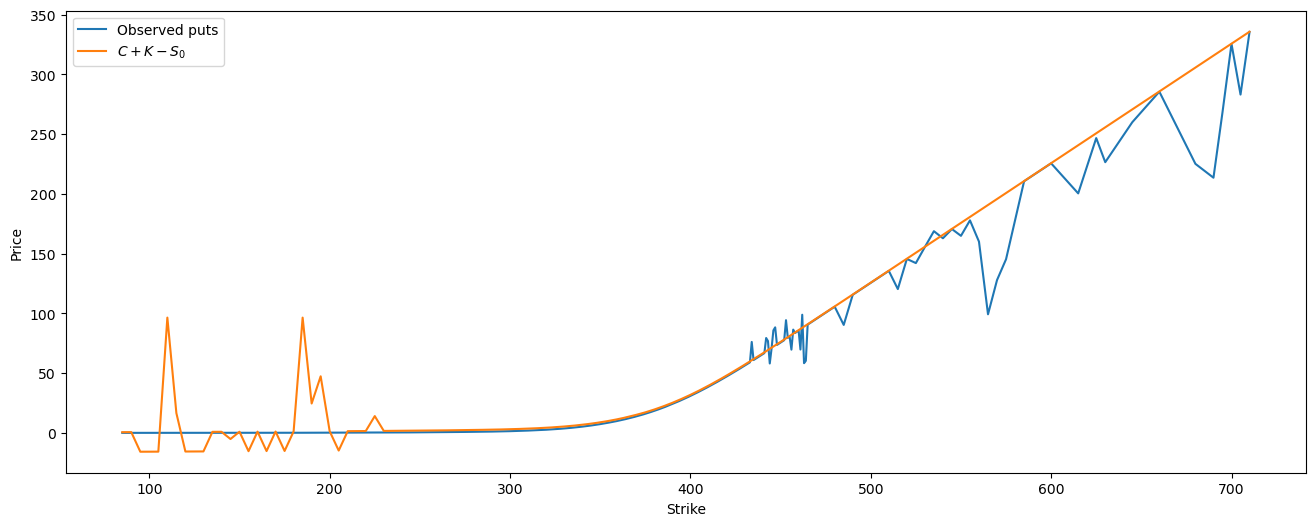

In [25]:
plt.figure(figsize = (16, 6))
plt.plot(df.Strike, df.P, label = "Observed puts")
plt.plot(df.Strike, df.Parity, label = r"$C + K - S_0$")
plt.xlabel('Strike')
plt.ylabel('Price')
plt.legend()

### Deriving the overtime interest rate. 

$$r = -\frac{ln |\frac{P + S_0 - C}{K}|}{T}$$

In [26]:
df["Time"] = (df.Expiry_x - dt.datetime.now()).dt.days / 255
df["r"] = - np.log((df.P + df.Underlying_Price_x)/df.Strike)/df.Time

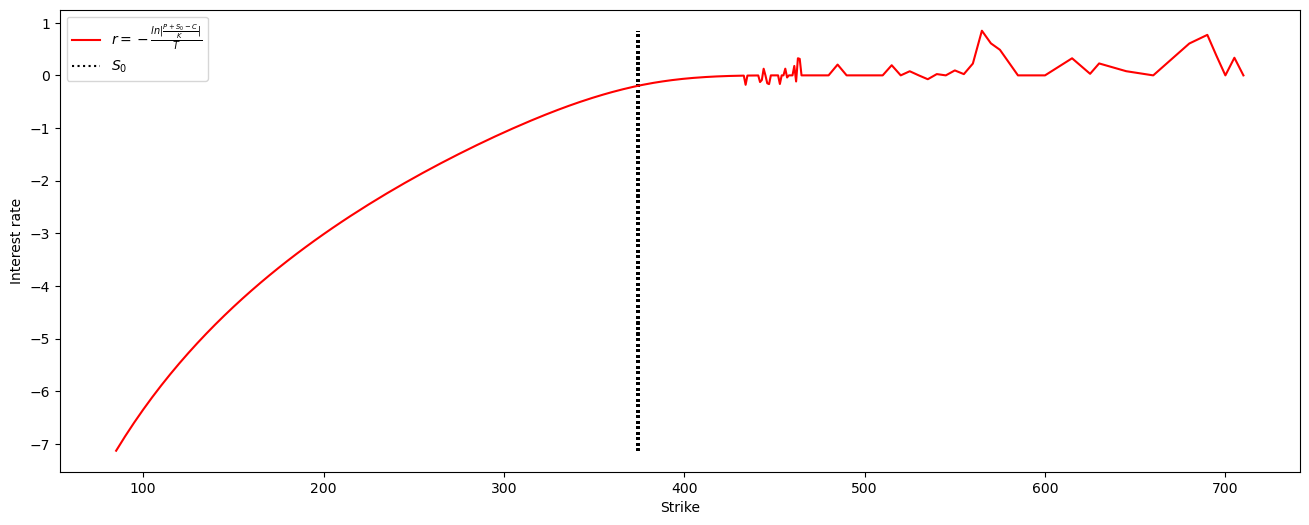

In [27]:
plt.figure(figsize = (16, 6))
plt.plot(df.Strike, df.r, label = r"$r = -\frac{ln |\frac{P + S_0 - C}{K}|}{T}$", color = "red")
plt.xlabel("Strike")
plt.ylabel("Interest rate")
plt.vlines(df.Underlying_Price_x, df.r.min(), df.r.max(), linestyle = "dotted", label = r"$S_0$", color = 'black')
plt.legend()

### PLotting the parity with respect to interest rate. 
 $P = C + K e^{-rT} - S_0$

In [28]:
df["Parity_i"] = df.C + df.Strike * np.exp(-df.r * df.Time) - df.Underlying_Price_x

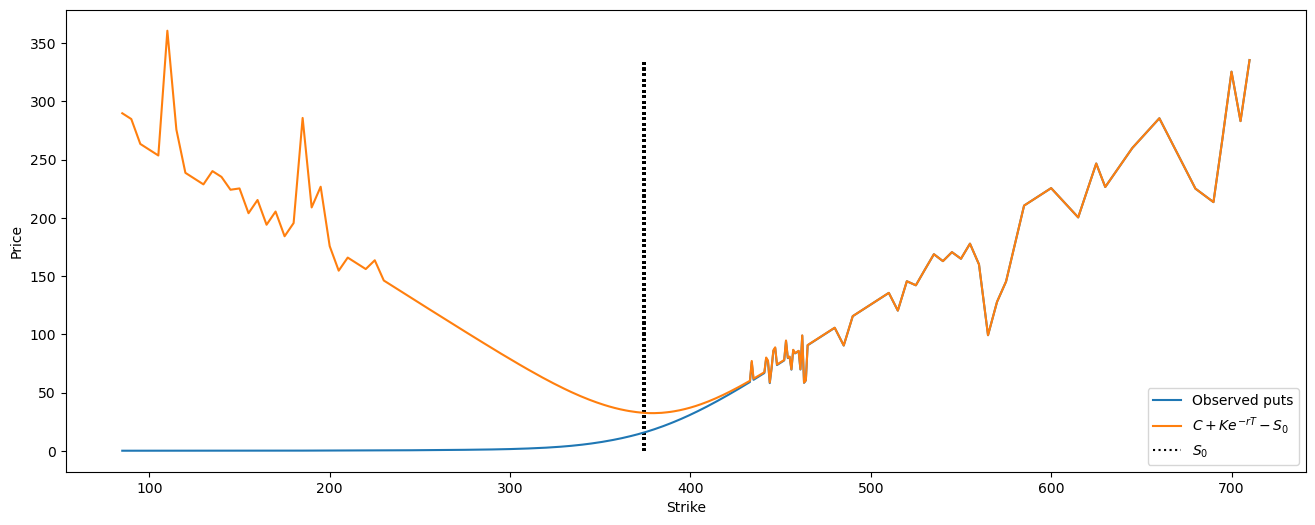

In [29]:
plt.figure(figsize = (16, 6))
plt.plot(df.Strike, df.P, label = "Observed puts")
plt.plot(df.Strike, df.Parity_i, label = r"$C + Ke^{-rT} - S_0$")
plt.xlabel('Strike')
plt.ylabel('Price')
plt.vlines(df.Underlying_Price_x, df.P.min(), df.P.max(), linestyle = "dotted", label = r"$S_0$", color = 'black')
plt.legend()